In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_absolute_error
#from sklego.preprocessing import RepeatingBasisFunction

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4],
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [3]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [4]:
data.drop_duplicates()

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [5]:
data.T.drop_duplicates().T

,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


In [6]:
data.drop(data.columns[data.nunique() == 1], axis=1)

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


Приведение к единой шкале: StandardScaler, MinMaxScaler

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [8]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

C:\Users\Maksim\AppData\Local\Temp\ipykernel_30544\645094770.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist= False, kde= True)


<Axes: ylabel='Density'>

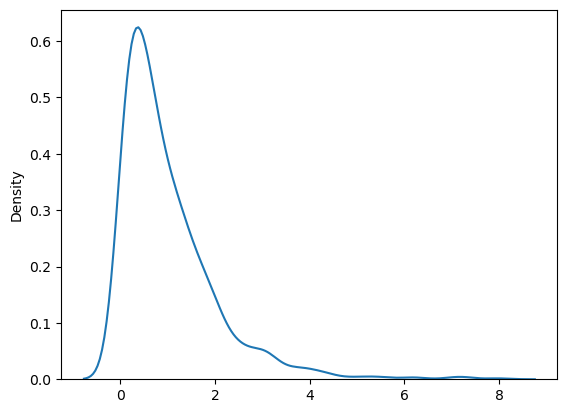

In [9]:
from scipy. stats import boxcox

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)

C:\Users\Maksim\AppData\Local\Temp\ipykernel_30544\2839650521.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False, kde=True)


<Axes: ylabel='Density'>

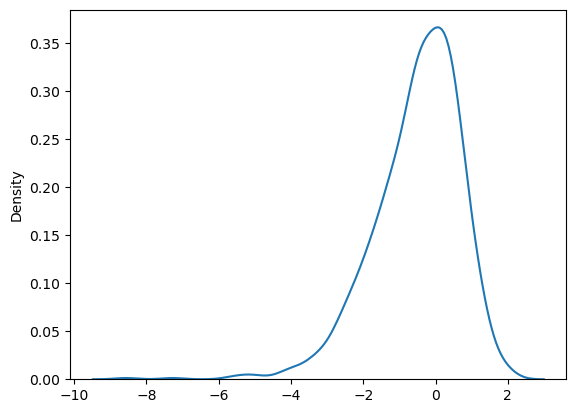

In [10]:
transformed_data = np.log(data)
sns.distplot(transformed_data, hist=False, kde=True)

C:\Users\Maksim\AppData\Local\Temp\ipykernel_30544\673703192.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False , kde=True)


<Axes: ylabel='Density'>

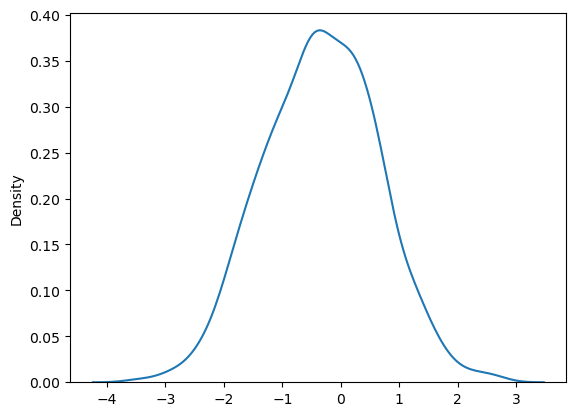

In [11]:
transformed_data, best_lambda = boxcox(data)

sns.distplot(transformed_data, hist=False , kde=True)

In [12]:
best_lambda

0.25287412475940646

# Домашнее задание

In [13]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [14]:
df = df.drop('index', axis = 1)
df.head()

,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,engine-stop,engine-type,gear-type,luxury,max-speed,power-electro-kw,supply-system,valves,valvetrain,weight,configurations_auto-premiere,configurations_back-wheel-base,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,9,-1.0,36457,9.0,4.3,0,3,4,2006,2018,2,1,36646,-1.0,-1.0,0,2,0,820.0,36479,1300.0,1,2,13,40.0,2018.0,16,3,0,1,2360
1,3,-1.0,44872,8.0,-1.0,3,7,4,1982,1993,2,2,44289,217.0,-1.0,0,1354,0,2350.0,44895,1555.0,4,2,13,108.0,1993.0,34,3,0,1,3060
2,3,-1.0,55927,16.0,4.2,0,4,5,2014,2018,0,1,55481,193.0,-1.0,0,2,0,1350.0,55963,1534.0,4,2,13,55.0,2019.0,35,3,0,1,2648
3,0,-1.0,41405,10.3,-1.0,0,4,4,2000,2003,2,1,40914,189.0,-1.0,1,0,1,1090.0,41425,1495.0,4,2,13,55.0,2003.0,10,3,0,1,2513
4,8,-1.0,22523,19.0,-1.0,0,4,8,2000,2005,0,1,22118,185.0,-1.0,3,0,1,1410.0,22491,1515.0,4,1,13,62.0,2005.0,10,3,0,1,2703


Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

Задача: добиться наименьшего MSE на test.

In [15]:
RANDOM_STATE = 42
TEST_SIZE = 0.25
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['target'], axis= 1),
    df['target'],
    test_size = TEST_SIZE,
    random_state = RANDOM_STATE
)

print(X_train.shape, X_test.shape)

(32433, 30) (10812, 30)


In [16]:
%time
num_columns = df.drop('target', axis = 1).columns
data_preprocessor = ColumnTransformer(
    [
     ('num', StandardScaler(), num_columns)    
    ],
    remainder='passthrough'
)

pipe_final = Pipeline(
    [('preprocessor', data_preprocessor),
     ('models', LinearRegression())  
    ]
)

param_grid = [
    {
        'models': [LinearRegression()],
        'models__fit_intercept': [True, False], 
        'models__positive': [True, False],  
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'models': [Ridge()],
        'models__alpha': [0.1, 1.0, 10],  
        'models__fit_intercept': [True, False],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'models': [Lasso()],
        'models__alpha': [0.1, 1.0, 10],  
        'models__fit_intercept': [True, False],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]
grid_search = GridSearchCV(
    pipe_final,
    param_grid,
    cv = 5,
    scoring= 'neg_mean_squared_error',
    n_jobs = -1,
)

grid_search.fit(X_train,y_train);

CPU times: total: 0 ns
Wall time: 0 ns


In [17]:
pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')[['param_models', 'param_models__fit_intercept',
                                                                          'param_models__positive','param_preprocessor__num',
                                                                          'param_models__alpha', 'mean_test_score', 'std_test_score',
                                                                          'rank_test_score']]

,param_models,param_models__fit_intercept,param_models__positive,param_preprocessor__num,param_models__alpha,mean_test_score,std_test_score,rank_test_score
32,Ridge(alpha=10),True,NaN,StandardScaler(),10,-3.000951e+04,786.552101,1
26,Ridge(alpha=10),True,NaN,RobustScaler(),1.0,-3.000967e+04,785.921326,2
27,Ridge(alpha=10),True,NaN,passthrough,1.0,-3.000976e+04,786.007220,3
24,Ridge(alpha=10),True,NaN,StandardScaler(),1.0,-3.000981e+04,786.805293,4
18,Ridge(alpha=10),True,NaN,RobustScaler(),0.1,-3.000983e+04,786.740999,5
...,...,...,...,...,...,...,...,...
28,Ridge(alpha=10),False,NaN,StandardScaler(),1.0,-7.106564e+06,6625.904365,60
20,Ridge(alpha=10),False,NaN,StandardScaler(),0.1,-7.106564e+06,6625.785398,61
12,LinearRegression(),False,False,StandardScaler(),NaN,-7.106564e+06,6625.772012,62
60,Lasso(),False,NaN,StandardScaler(),10,-7.108285e+06,7533.851813,63


In [18]:
print('Better model analysis:\n', grid_search.best_params_)
print ('MSE of better model(crossvalidation)', grid_search.best_score_)

Лучшая модель и её параметры:

 {'models': Ridge(alpha=10), 'models__alpha': 10, 'models__fit_intercept': True, 'preprocessor__num': StandardScaler()}
Метрика MSE лучшей модели на кроссвалидации: -30009.50712026548


Тестируем лучшую модель

In [19]:
y_pred = (grid_search.predict(X_test))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("коэф детерминации:", r2)
print('MSE на тесте', mse)
print('отноение rmse к среднему таргерту = ', np.sqrt(mse)/df['target'].mean())

коэф детерминации: 0.4638659164383786
MSE на тесте 31102.32147414488
отноение rmse к среднему таргерту =  0.06627960129923668


Отношение корня из средней квадратичной ошибки к среднему таргету очень нелпохое 0.06. Можно сказать что средняя ошибка модели составляет 6% от среднего значения целевой переменной, это неплохая точность. Однако кожффициент детерминации плохой, 0.46. Возможно дело в большой дисперсии

In [20]:
df['target'].std()/df['target'].mean()

0.08881285780010834

дисперсия небольшая. тогда что такое

In [21]:
print((y_test - y_pred).mean()) 


0.49887167936595705


В целом оценка почти не смещенная

count    10812.000000
mean         0.498872
std        176.365953
min      -1176.129961
25%        -91.149188
50%        -10.065210
75%         79.082443
max       1949.013014
Name: target, dtype: float64


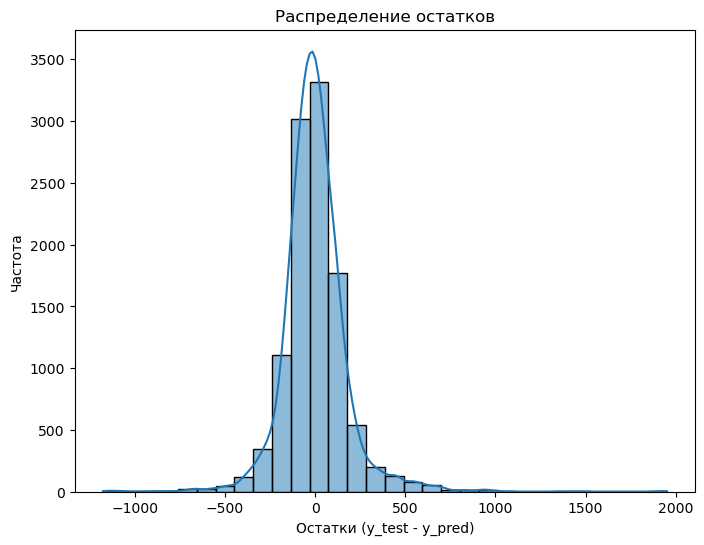

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30) 
plt.xlabel("Остатки (y_test - y_pred)")
plt.ylabel("Частота")
plt.title("Распределение остатков")
print(residuals.describe())
plt.show()

график остатков напоминает нормальное распределение, но с длинными хвостами- выбросами. На графике остатков есть выбросы, двовольно большие, а при возведении в квадрат для подсчета коэффициента детерминации они станут огромными, по этой причине и коэффициент детерминации такой плохой. Сама же модель неплоха, отношение rmse к среднему таргету = 0.06. Модель в среднем ошибается на 6% - нормально

Получается модель плохо справилась с выбросами, а так она нормальная. Чтобы ситуация стала лучше, можно попробовать другие более сложные модели

## Baseline

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [24]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
train_X

,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,engine-stop,engine-type,gear-type,luxury,max-speed,power-electro-kw,supply-system,valves,valvetrain,weight,configurations_auto-premiere,configurations_back-wheel-base,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male
22607,3,-1.0,11636,9.5,-1.0,0,4,4,1997,2000,2,0,11923,160.0,-1.0,0,2,0,1290.0,11642,1415.0,4,2,13,50.0,2000.0,16,3,0,1
36531,8,-1.0,31764,9.0,-1.0,0,4,0,1990,1993,2,1,31915,145.0,-1.0,0,0,4,935.0,31785,1310.0,1,2,13,48.0,1996.0,23,3,0,0
24048,8,-1.0,2773,8.8,6.8,0,4,4,2009,2012,2,1,2258,221.0,-1.0,3,2,4,1373.0,2763,1558.0,4,1,13,56.0,2012.0,10,3,0,1
34819,3,-1.0,52039,14.0,5.3,0,4,5,2015,2017,0,1,51108,198.0,-1.0,0,2,4,1430.0,52081,1590.0,4,2,13,56.0,2017.0,16,3,0,0
1328,3,-1.0,20689,18.0,7.5,0,5,5,2004,2005,0,1,20228,195.0,-1.0,0,2,0,1485.0,20685,1560.0,4,2,13,70.0,2009.0,28,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,6,-1.0,42729,16.5,4.7,0,4,5,2017,0,0,2,44681,230.0,-1.0,0,2,4,1655.0,42742,1630.0,4,2,13,68.0,-1.0,10,3,0,1
11284,0,-1.0,46093,8.1,-1.0,3,7,0,1987,1990,2,0,46106,-1.0,-1.0,0,0,4,-1.0,46131,1486.0,4,2,13,82.0,1996.0,34,3,0,1
38158,3,-1.0,48819,10.0,7.6,0,4,2,2018,0,2,0,48158,202.0,-1.0,0,2,0,1562.0,48858,1636.0,4,2,13,62.0,-1.0,26,3,0,1
860,10,-1.0,9346,22.4,-1.0,0,4,6,1992,1995,0,1,8757,-1.0,-1.0,0,0,3,-1.0,9412,1460.0,1,2,13,50.0,1995.0,16,3,0,1


In [26]:
reg = LinearRegression().fit(train_X, train_y)

In [27]:
reg.score(train_X, train_y)

0.4554873855035074

In [28]:
reg.score(test_X, test_y)

0.4647153732232151

In [29]:
mean_squared_error(reg.predict(train_X), train_y)

29843.042074394034

In [30]:
mean_squared_error(reg.predict(test_X), test_y)

31015.753109119472